In [2]:
%config IPCompleter.greedy=True

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df = 

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_

SyntaxError: invalid syntax (<ipython-input-2-701e3649f7f6>, line 7)

In [1]:
import trade_model as td
dm = td.DataModel("../xcels", ["master0.csv", "master1.csv"])
dm.read()


In [5]:
symbol = "فولاد"
# df = dm.get(symbol, "2017-05-19", "2017-09-03")
df = dm.get(symbol, "1394-4-23", "1394-6-18")
df

,symbol,name,amount,volume,value,lastday,open,close,last-change,last-percent,ending,ending-change,ending-percent,min,max,year,month,day,diff_min_max,diff_open
date,,,,,,,,,,,,,,,,,,,,
2015-07-14,فولاد,فولاد مباركه اصفهان,821,9103670,17165293965,1897.0,1920.0,1870.0,-27.0,-1.42,1886.0,-11.0,-0.58,1860.0,1920.0,1394,4,23,3.225806,-1.212441
2015-07-15,فولاد,فولاد مباركه اصفهان,966,10850856,20021659551,1886.0,1887.0,1860.0,-26.0,-1.38,1845.0,-41.0,-2.17,1820.0,1899.0,1394,4,24,4.340659,-0.053022
2015-09-09,فولاد,فولاد مباركه اصفهان,915,14460212,17158254326,1395.0,1170.0,1180.0,-215.0,-15.41,1187.0,-208.0,-14.91,1170.0,1207.0,1394,6,18,3.162393,16.129032


/home/nimac/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 735442.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/home/nimac/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 735442.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


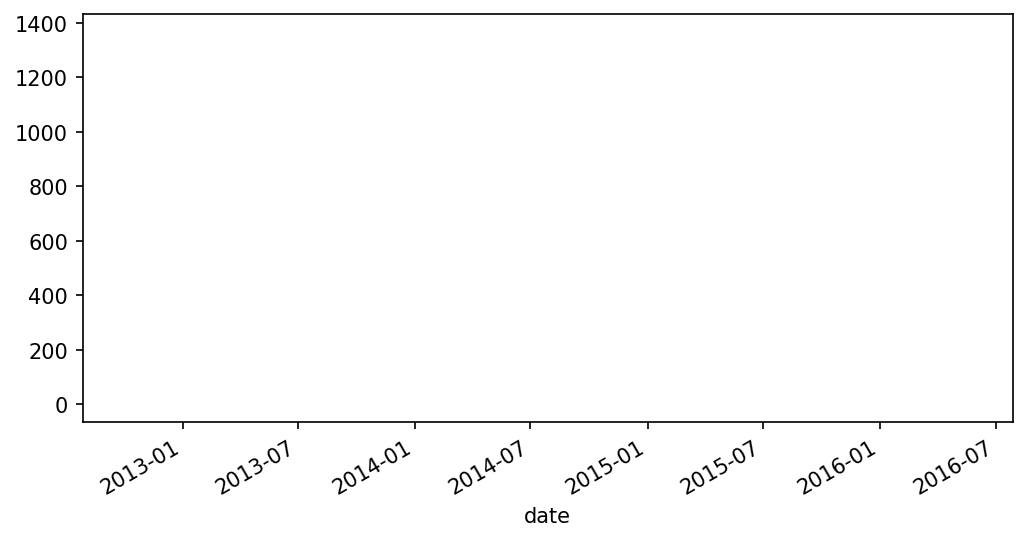

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=150)
df["diff_open"].plot()

df["close"].plot()

In [16]:
%%writefile trade_model.py

import pandas as pd
from khayyam import JalaliDate, JalaliDatetime

def add_diff_min_max(df): 
    df["diff_min_max"] = (df['max']-df['min'])*100/(df['min'])

def add_diff_open(df):
    df["diff_open"] = (df['lastday']-df['open'])*100/(df['lastday'])

def add_adjusted(df):
    

class DataModel:
    def __init__(self,data_location, file_names=[]):  
        self.data_location = data_location;
        self.file_names = file_names;
    
    def __read_csv(self, file_name):
        return pd.read_csv(f'{self.data_location}/{file_name}', sep=',',header=[0], parse_dates=["date"])

#     TODO: use pystore instead
    def read(self):
        dfs = []
        for name in self.file_names:
            dfs.append(self.__read_csv(name))
        self.df = pd.concat(dfs, ignore_index=True)
        add_diff_min_max(self.df)
        add_diff_last_close(self.df)
        self.df = add_adjusted(self.df)
        self.df = self.df.set_index('date')

#         self.allSymbols = self.df.symbol.tolist()
#         self.symbols = list(set(self.df.symbol))[1:]
#         counts = Counter(self.allSymbols)
#         testSymbols = []
#         tmpSymbols = []
#         for symbol in symbols:
#             if counts[symbol] > RECORD_THRESHOLD:
#                 tmpSymbols.append(symbol)
#         for i in range(TESTCASE_NUMBER):
#             ran = random.randint(0, len(tmpSymbols)-1)
#             testSymbols.append(tmpSymbols[ran])
#             tmpSymbols.remove(tmpSymbols[ran])
#         print("test symbol", len(testSymbols))


    def get(self, symbol, start="", end=""):
        
        if start == "":
            start = self.df.index[0]
        else:
            s_date = start.split("-")
            start = JalaliDate(s_date[0], s_date[1], s_date[2]).todate()
        if end == "":
            end = self.df.index[-1]
        else:
            e_date = end.split("-")
            end = JalaliDate(e_date[0], e_date[1], e_date[2]).todate()
        tmpdf = self.df.loc[start:end]
        return tmpdf.loc[tmpdf["symbol"]==symbol].copy()
    


Overwriting trade_model.py
